# **EDA and preprocessing of cubic zirconia dataset** 
## **-by AFZAL**  

### Cubic zirconia is an inexpensive diamond alternative with many of the same qualities as a diamond.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use("seaborn-darkgrid")

pd.options.display.max_colwidth=200

from sys import path 
path.insert(0, 'D:/python/PROJECTS/GIT/EDA/')

# Importing data

In [2]:
df=pd.read_csv('cubic_zirconia.csv').drop(columns='Unnamed: 0', axis=1)
df.head()

carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

# Data dictionary

In [3]:
data_dict=pd.read_excel('data_dict.xlsx', index_col='Variable Name')
data_dict

Description
Variable Name                                                                                                                                                                                                        
Carat                                                                                                                                                                             Carat weight of the cubic zirconia.
Cut                                                                                                Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color                                                                                                                                             Colour of the cubic zirconia.With D being the best and J the worst.
Clarity         cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
Depth                                                                                                   The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table                                                                                                                      The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price                                                                                                                                                                                the Price of the cubic zirconia.
X                                                                                                                                                                                 Length of the cubic zirconia in mm.
Y                                                                                                                                                                                  Width of the cubic zirconia in mm.
Z                                                                                                                                                                                 Height of the cubic zirconia in mm.

### Lets have a look at the gemstone specifications

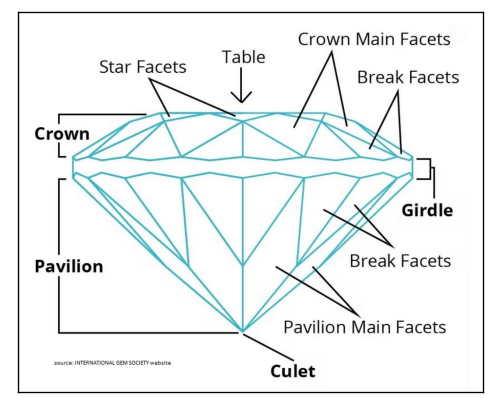

In [4]:
style.use('default')
plt.figure(figsize=(5,5), dpi=120)
plt.imshow(plt.imread('gemstone specs.JPG'), ); plt.xticks([]); plt.yticks([]); plt.show()
style.use("seaborn-darkgrid")

# Basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### There are 3 object columns

In [6]:
# checking missing values
print('Missing values in each column:')
df.isna().sum()

Missing values in each column:


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### ***Looks like there are a few missing values in depth***

### Checking object columns 

In [7]:
for column in df.select_dtypes('object'):
    print(f'\nunique value counts in "{column}":')
    print( df[column].value_counts().sort_index() )


unique value counts in "cut":
Fair           781
Good          2441
Ideal        10816
Premium       6899
Very Good     6030
Name: cut, dtype: int64

unique value counts in "color":
D    3344
E    4917
F    4729
G    5661
H    4102
I    2771
J    1443
Name: color, dtype: int64

unique value counts in "clarity":
I1       365
IF       894
SI1     6571
SI2     4575
VS1     4093
VS2     6099
VVS1    1839
VVS2    2531
Name: clarity, dtype: int64


### Looks like categorical data is clean since all values are mentioned in data dictionary
### Imputing missing values
    Lets have a look at the distribution of "depth" feature

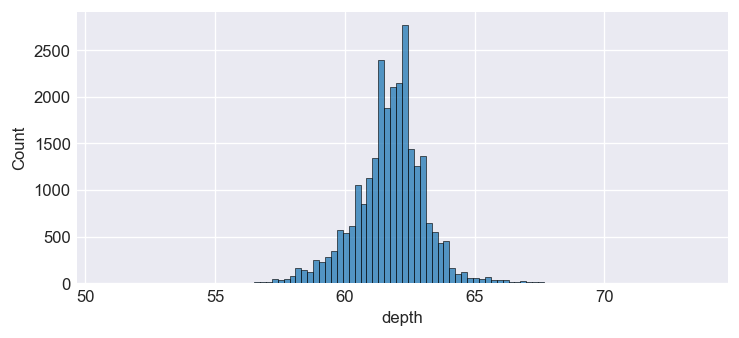

In [8]:
plt.figure(figsize=(7,3), dpi=120)
sns.histplot(df.depth, bins=100)
plt.show()

### Looks like data is almost normally distributed and hence "mean" can be used to impute missing values

In [9]:
df.depth.fillna( df.depth.mode()[0], inplace = True)

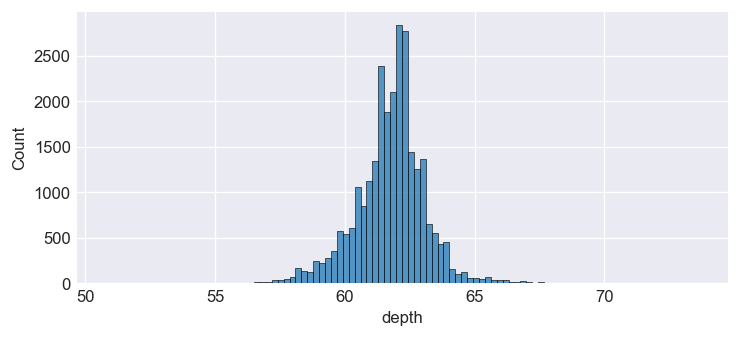

In [10]:
plt.figure(figsize=(7,3), dpi=120)
sns.histplot(df.depth, bins=100)
plt.show()

### We can see now that there is an increase in the values around mean

# Encoding categorical features

    The values are encoded in such a way that the worst quality gets lowest value because these are ordinal

In [11]:
# making a dictionary of the classes in each categorical feature in order of worst to best
cut_classes = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_classes = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_classes = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']

dict_classes={'cut' : cut_classes, 'color' : color_classes, 'clarity' : clarity_classes}

for col in dict_classes.keys():
    df[col+'_enc'] = df[col].replace( to_replace= dict_classes[col], value=range(len(dict_classes[col])) )
    
df.head()

carat        cut color clarity  depth  table     x     y     z  price  \
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499   
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984   
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289   
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082   
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779   

   cut_enc  color_enc  clarity_enc  
0        4          5            4  
1        3          3            9  
2        2          5            7  
3        4          4            6  
4        4          4            8

In [12]:
df.clarity.value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [13]:
df.clarity_enc.value_counts().sort_index()

2     365
3    4575
4    6571
5    6099
6    4093
7    2531
8    1839
9     894
Name: clarity_enc, dtype: int64

### **Now our data is clean and ready to be analysed**

# **Univariate analysis**

In [14]:
#####################################
'''IMPORTING FROM MY CUSTOM MODULE'''
#####################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation, multiplot, mutual_info

### Quantative features

				ANALYSIS OF: carat 

5 point summary for: carat
     carat
min   0.20
25%   0.40
50%   0.70
75%   1.05
max   4.50
---------------------------------
OUTLIERS in carat via Z score

Outlier limits:
lower limit: -0.6348344246824467 
upper limit: 2.231585268306135

Total outliers: 202
       outliers   Z-score
4184       2.24  3.017614
26330      2.24  3.017614
14462      2.24  3.017614
16208      2.24  3.017614
2384       2.24  3.017614 
.
.
       outliers   Z-score
15080      3.51  5.675982
8156       4.00  6.701652
20505      4.01  6.722584
3025       4.01  6.722584
12500      4.50  7.748254
---------------------------------
OUTLIERS in carat via IQR

Outlier limits:
lower limit: -0.5750000000000001 
upper limit: 2.0250000000000004

Total outliers: 662
       carat
10130   2.03
4488    2.03
9211    2.03
4195    2.03
23604   2.03 
.
.
       carat
15080   3.51
8156    4.00
3025    4.01
20505   4.01
12500   4.50
---------------------------------


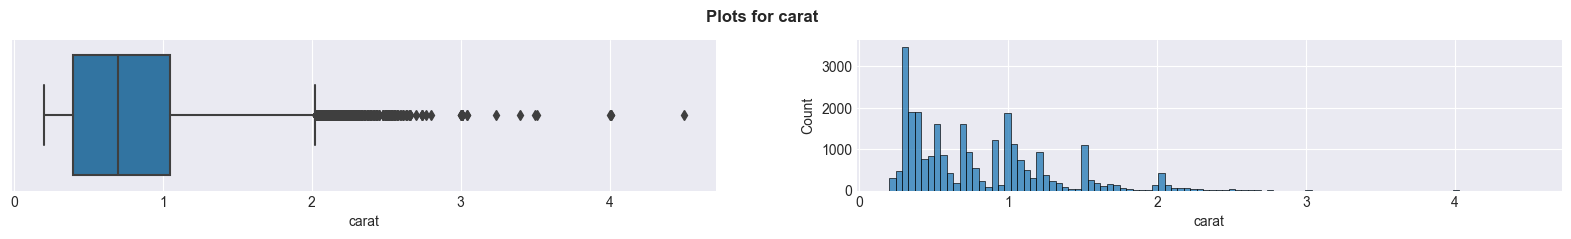

___________________________________________________________________________________________________________
				ANALYSIS OF: depth 

5 point summary for: depth
     depth
min   50.8
25%   61.1
50%   61.9
75%   62.5
max   73.6
---------------------------------
OUTLIERS in depth via Z score

Outlier limits:
lower limit: 57.56660838826076 
upper limit: 65.93685881239189

Total outliers: 365
       outliers   Z-score
493        50.8 -7.850470
10280      52.2 -6.846916
2633       52.7 -6.488504
5684       53.1 -6.201774
6925       53.2 -6.130092 
.
.
       outliers   Z-score
3675       71.3  6.844431
23295      71.6  7.059478
25883      72.2  7.489573
25862      72.9  7.991350
17724      73.6  8.493127
---------------------------------
OUTLIERS in depth via IQR

Outlier limits:
lower limit: 59.0 
upper limit: 64.6

Total outliers: 1419
       depth
493     50.8
10280   52.2
2633    52.7
5684    53.1
10662   53.2 
.
.
       depth
3675    71.3
23295   71.6
25883   72.2
25862   72.9
17724   

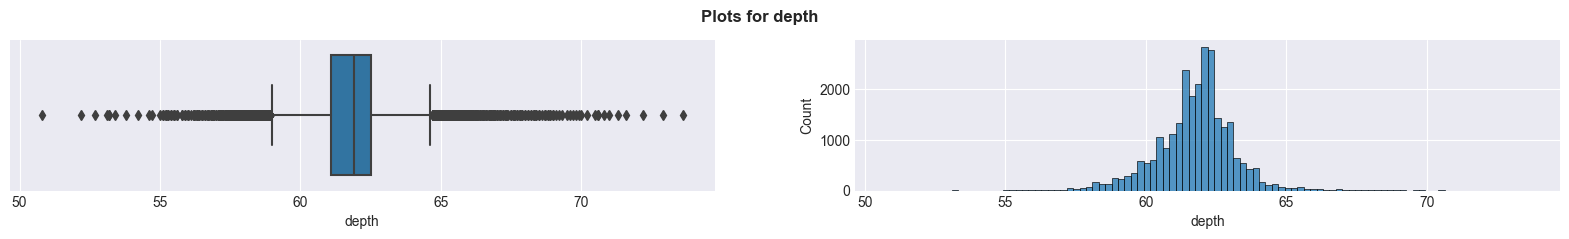

___________________________________________________________________________________________________________
				ANALYSIS OF: table 

5 point summary for: table
     table
min   49.0
25%   56.0
50%   57.0
75%   59.0
max   79.0
---------------------------------
OUTLIERS in table via Z score

Outlier limits:
lower limit: 50.76000008248995 
upper limit: 64.15215922332828

Total outliers: 184
       outliers   Z-score
6521       49.0 -3.788521
20736      49.0 -3.788521
6776       50.0 -3.340498
15336      50.1 -3.295695
6627       64.2  3.021434 
.
.
      outliers   Z-score
9839      70.0  5.619969
9617      70.0  5.619969
2633      70.0  5.619969
5067      76.0  8.308109
4769      79.0  9.652179
---------------------------------
OUTLIERS in table via IQR

Outlier limits:
lower limit: 51.5 
upper limit: 63.5

Total outliers: 318
       table
6521    49.0
20736   49.0
6776    50.0
15336   50.1
13248   51.0 
.
.
      table
2633   70.0
9617   70.0
1861   70.0
5067   76.0
4769   79.0
--------

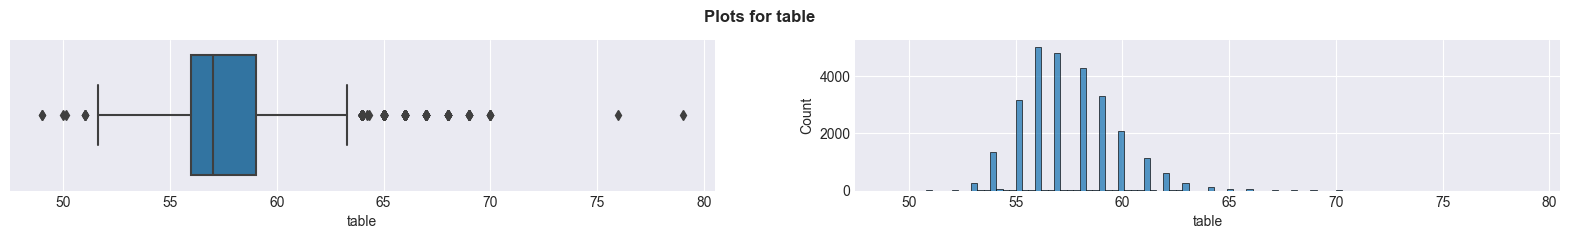

___________________________________________________________________________________________________________
				ANALYSIS OF: x 

5 point summary for: x
         x
min   0.00
25%   4.71
50%   5.69
75%   6.55
max  10.23
---------------------------------
OUTLIERS in x via Z score

Outlier limits:
lower limit: 2.344367164392687 
upper limit: 9.115339884963934

Total outliers: 19
       outliers   Z-score
17506      0.00 -5.077427
5821       0.00 -5.077427
6215       0.00 -5.077427
669        9.14  3.021852
2907       9.24  3.110466 
.
.
       outliers   Z-score
15080      9.66  3.482643
8156      10.01  3.792790
3025      10.02  3.801652
20505     10.14  3.907988
12500     10.23  3.987740
---------------------------------
OUTLIERS in x via IQR

Outlier limits:
lower limit: 1.9500000000000002 
upper limit: 9.309999999999999

Total outliers: 15
          x
5821   0.00
6215   0.00
17506  0.00
15488  9.36
16538  9.38 
.
.
           x
15080   9.66
8156   10.01
3025   10.02
20505  10.14
12500 

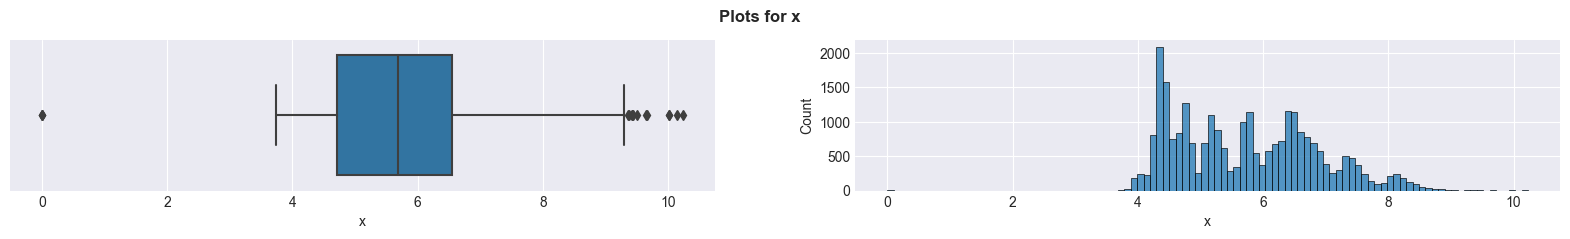

___________________________________________________________________________________________________________
				ANALYSIS OF: y 

5 point summary for: y
         y
min   0.00
25%   4.71
50%   5.71
75%   6.54
max  58.90
---------------------------------
OUTLIERS in y via Z score

Outlier limits:
lower limit: 2.235461077389525 
upper limit: 9.231676535248145

Total outliers: 16
       outliers   Z-score
5821       0.00 -4.917146
6215       0.00 -4.917146
17506      0.00 -4.917146
17076      9.26  3.024290
15488      9.31  3.067171 
.
.
       outliers    Z-score
3025       9.94   3.607463
8156       9.94   3.607463
20505     10.10   3.744680
12500     10.16   3.796136
25795     58.90  45.595878
---------------------------------
OUTLIERS in y via IQR

Outlier limits:
lower limit: 1.9649999999999999 
upper limit: 9.285

Total outliers: 15
          y
5821   0.00
6215   0.00
17506  0.00
15488  9.31
16538  9.31 
.
.
           y
3025    9.94
8156    9.94
20505  10.10
12500  10.16
25795  58.90

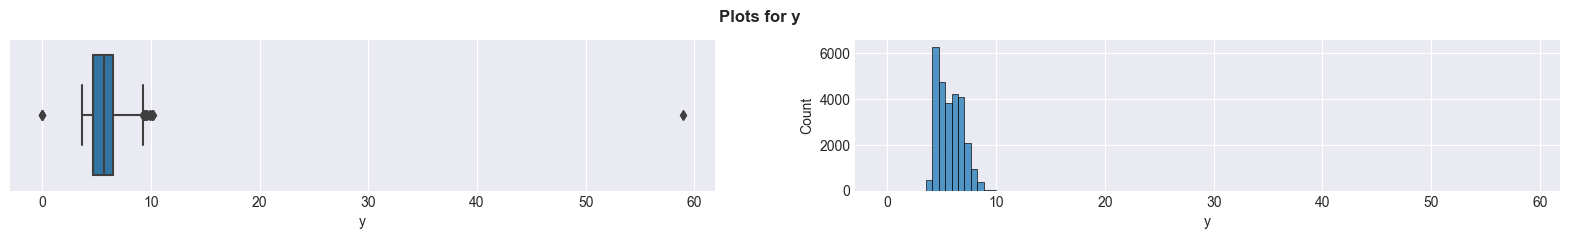

___________________________________________________________________________________________________________
				ANALYSIS OF: z 

5 point summary for: z
         z
min   0.00
25%   2.90
50%   3.52
75%   4.04
max  31.80
---------------------------------
OUTLIERS in z via Z score

Outlier limits:
lower limit: 1.376226462243991 
upper limit: 5.699888048083446

Total outliers: 25
       outliers   Z-score
12498       0.0 -4.909807
23758       0.0 -4.909807
5821        0.0 -4.909807
6034        0.0 -4.909807
6215        0.0 -4.909807 
.
.
       outliers    Z-score
12758      6.27   3.791152
8156       6.31   3.846660
12500      6.72   4.415622
25795      8.06   6.275157
344       31.80  39.219456
---------------------------------
OUTLIERS in z via IQR

Outlier limits:
lower limit: 1.1899999999999997 
upper limit: 5.75

Total outliers: 23
         z
10827  0.0
18194  0.0
17506  0.0
5821   0.0
6034   0.0 
.
.
           z
12758   6.27
8156    6.31
12500   6.72
25795   8.06
344    31.80
------

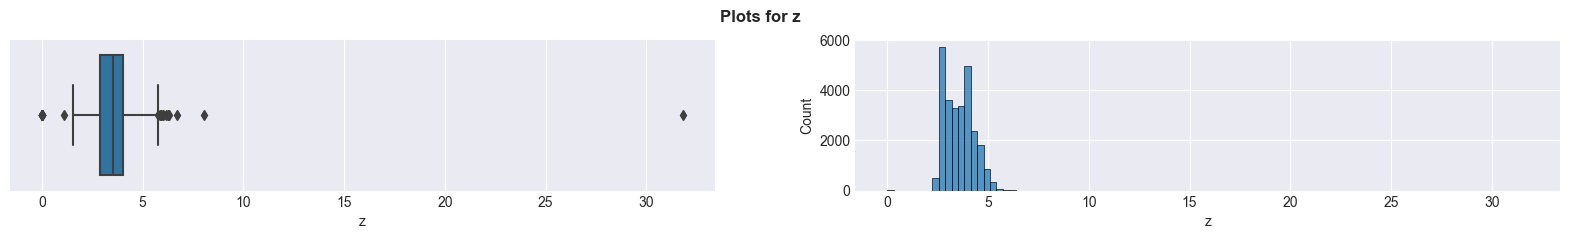

___________________________________________________________________________________________________________
				ANALYSIS OF: price 

5 point summary for: price
       price
min    326.0
25%    945.0
50%   2375.0
75%   5360.0
max  18818.0
---------------------------------
OUTLIERS in price via Z score

Outlier limits:
lower limit: -8134.852002879528 
upper limit: 16013.888232345173

Total outliers: 582
       outliers   Z-score
14266     16018  3.001022
26061     16021  3.001767
26845     16025  3.002761
7878      16037  3.005742
23029     16041  3.006736 
.
.
       outliers   Z-score
16007     18791  3.690002
2229      18795  3.690995
17892     18795  3.690995
12687     18804  3.693232
2590      18818  3.696710
---------------------------------
OUTLIERS in price via IQR

Outlier limits:
lower limit: -5677.5 
upper limit: 11982.5

Total outliers: 1779
       price
7900   11988
19191  12000
3417   12008
7579   12009
7582   12012 
.
.
       price
16007  18791
17892  18795
2229   18795
1

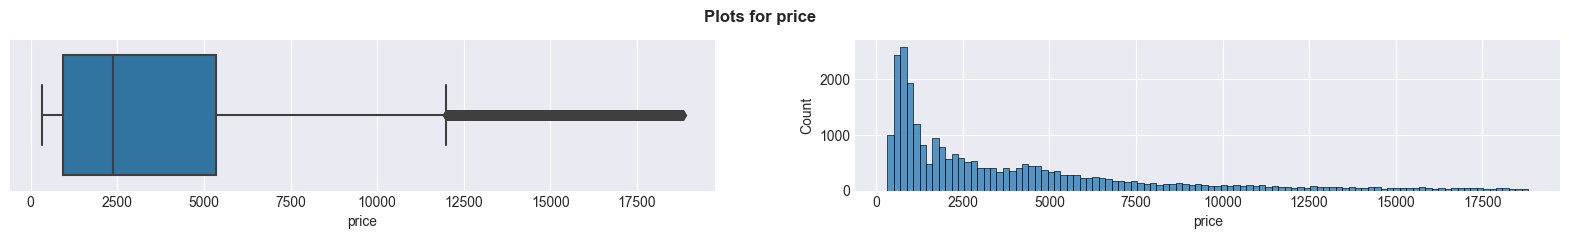

___________________________________________________________________________________________________________


In [15]:
columns_quant=df.describe().columns
analysis_quant(df, columns_quant[:-3], bins=100, figsize=(20,2), dpi=100)

### Key Takeaways:
+ Features like **"carat"**, **"price"** are **heavily right skewed** whick means higher carat and higher priced stones have less occurance
+ Features **"x", "y", "z"** have some absurd **outliers** in either ends 
+ **"table"** looks like a **discrete** feature 

### Lets see the number of unique values in table

In [16]:
df.table.nunique()

112

### ***We can see that there are only 112 unique values and hence "table" feature is discrete***

### Lets **replace** the extreme values in **x, y, z** features with an acceptable value with respect to z score value of +3 or -3

Compressed the following outliers in z:

Total outliers: 13
         z
5821   0.0
6034   0.0
6215   0.0
10827  0.0
12498  0.0 
.
.
           z
23758   0.00
21604   1.07
4828    1.53
25795   8.06
344    31.80


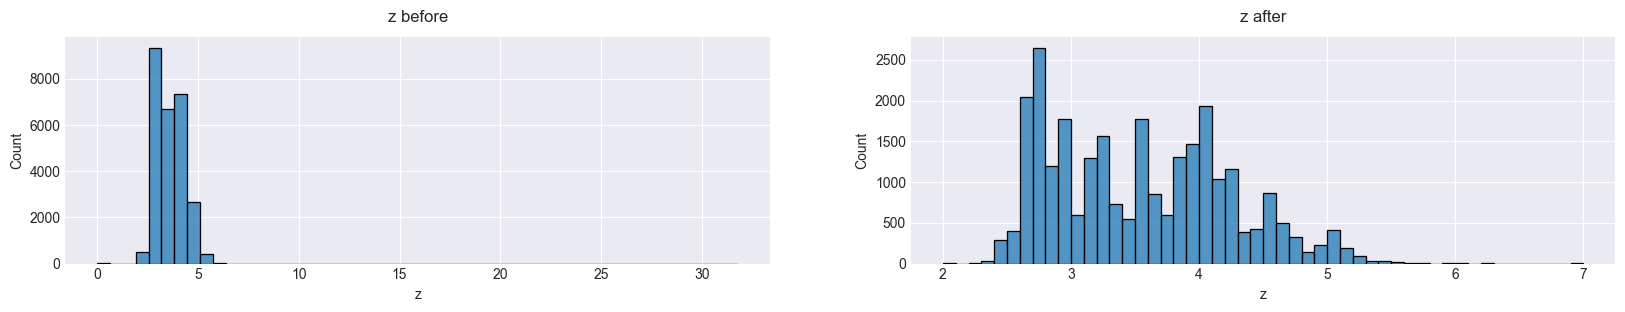

_____________________________________________________________________________________________________________________
Compressed the following outliers in y:

Total outliers: 6
5821      0.00
6215      0.00
17506     0.00
20505    10.10
12500    10.16
25795    58.90
Name: y, dtype: float64


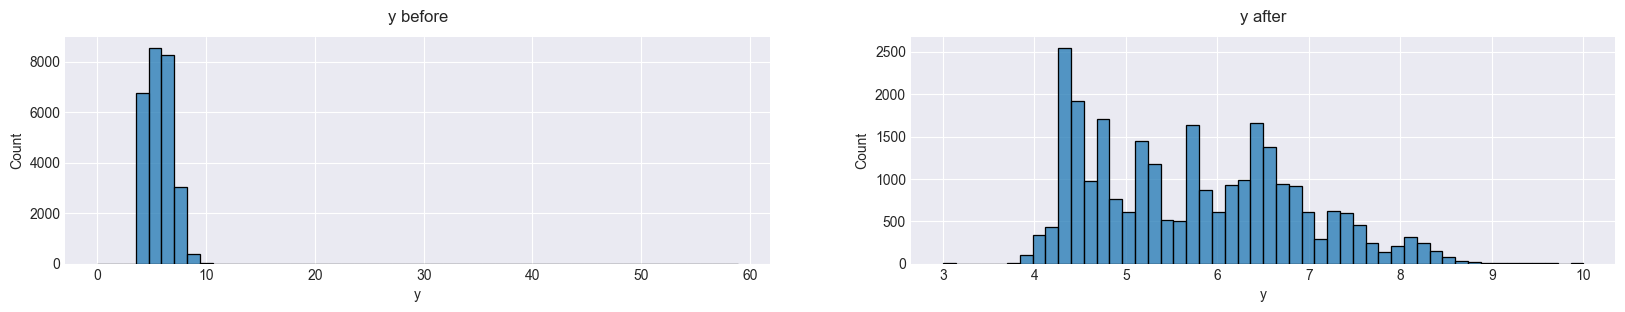

_____________________________________________________________________________________________________________________
Compressed the following outliers in x:

Total outliers: 3
5821     0.0
6215     0.0
17506    0.0
Name: x, dtype: float64


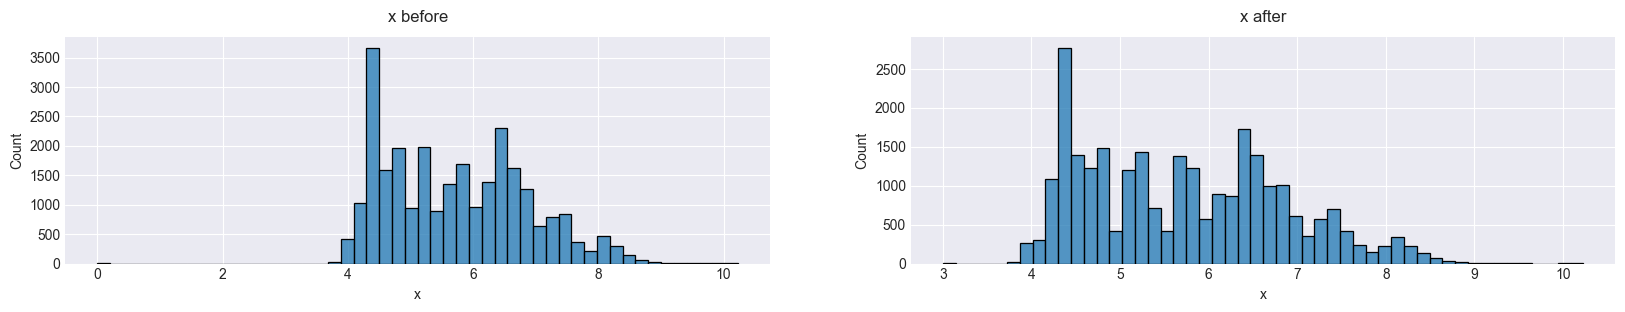

_____________________________________________________________________________________________________________________


In [17]:
handle_outliers(df, 'z', using='custom', custom_intervals=(2,7))
handle_outliers(df, 'y', using='custom', custom_intervals=(3,10))
handle_outliers(df, 'x', using='custom', custom_intervals=(3,None))

    Now our data looks much better 

### Categorical features

				ANALYSIS OF: cut 

No. of UNIQUE values:
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64



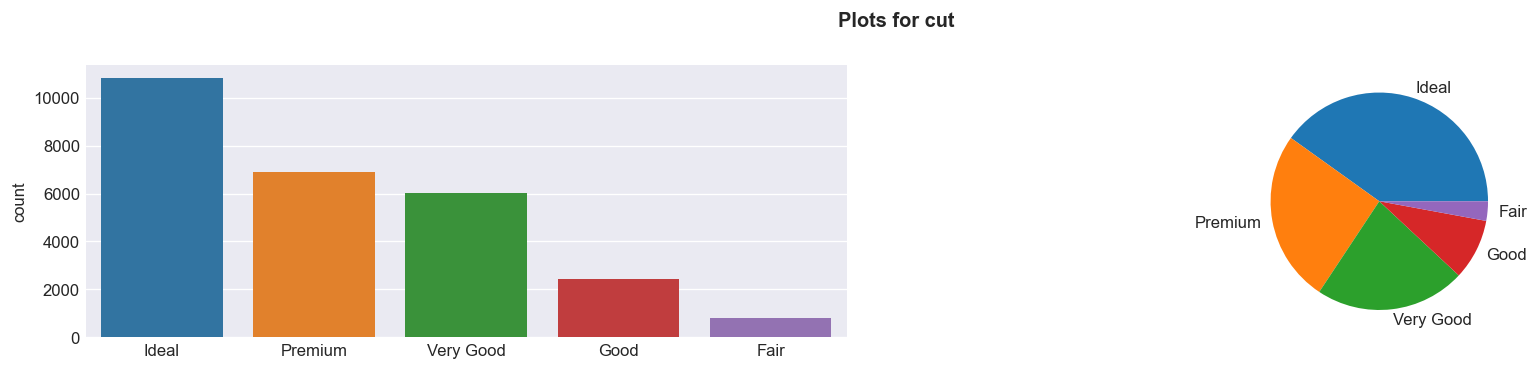

_____________________________________________________________________________________________________________________
				ANALYSIS OF: color 

No. of UNIQUE values:
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64



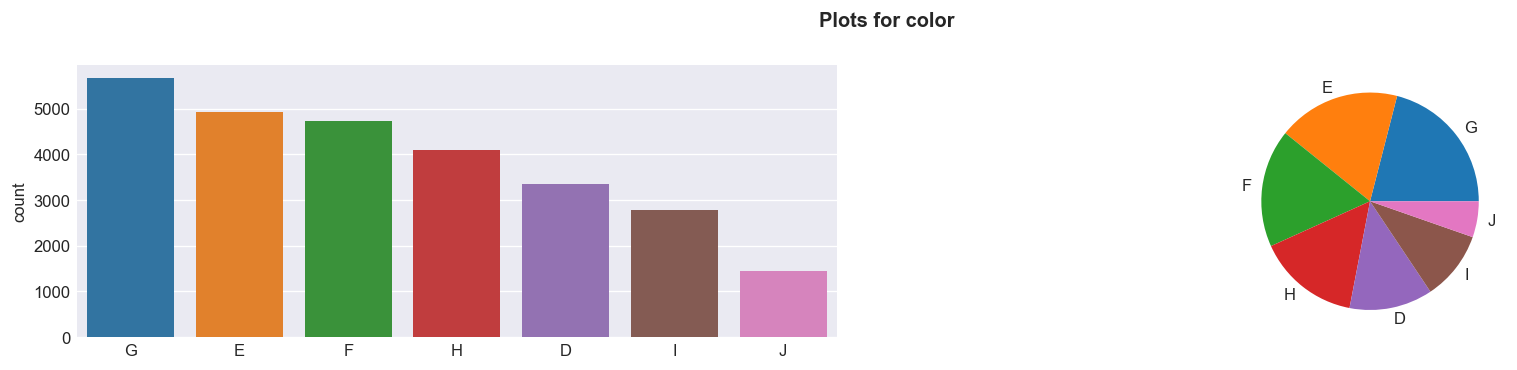

_____________________________________________________________________________________________________________________
				ANALYSIS OF: clarity 

No. of UNIQUE values:
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64



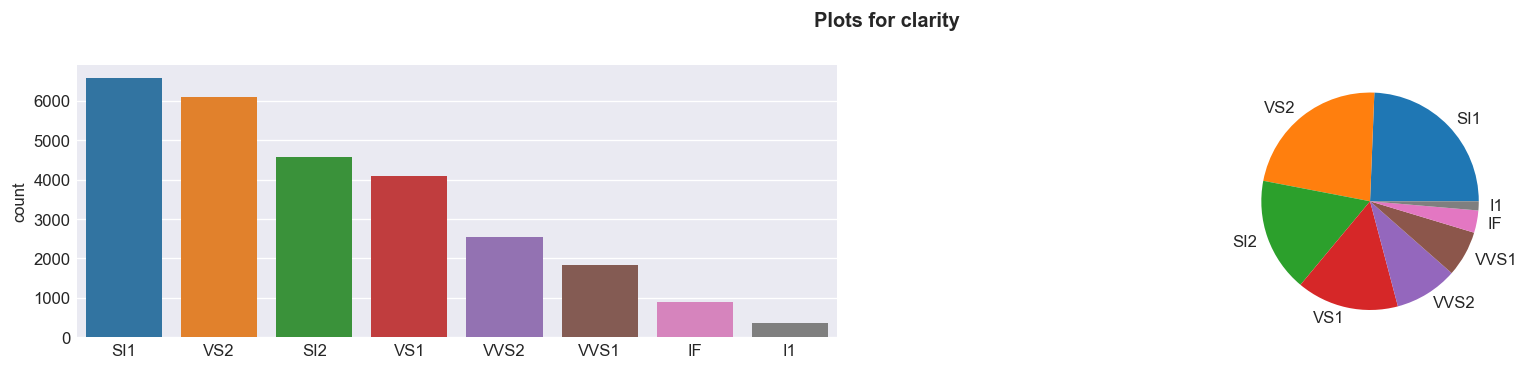

_____________________________________________________________________________________________________________________


In [18]:
analysis_cate(df, dict_classes.keys(), figsize=(18,3), dpi=120)

### Key takeaways:
+ There is heavy imbalance in the occurance of lower quality cuts
</br> - **"Ideal", "Premium" and "Very Good"** cuts are in **abundance** as compared to lower grade cuts

+ There seems to be an imbalance in the occurance of the colors
</br>- lowest quality stones **"I", "J"** are **lowest** in occurance
</br>- the highest quality color **"D"** also has **low** occurance

+ There is heavy imbalance in the occurance of clarity (**FL l2 l3** are not occuring in this dataset)
</br>- This means the flawless(**"FL"**) as well as worst clarity stones(**"L2", "L3"**) are **not** occuring in this dataset 
</br>- High clarity stones with **VVS2 VVS1 IF** are occuring **less** as compared to mid clarity 
</br>- **L1**- the third lowest class in clarity also occurs **less** as compared to mid clarity 

# **Bivariate analysis**

### Lets have an overview of the features

### Correlation

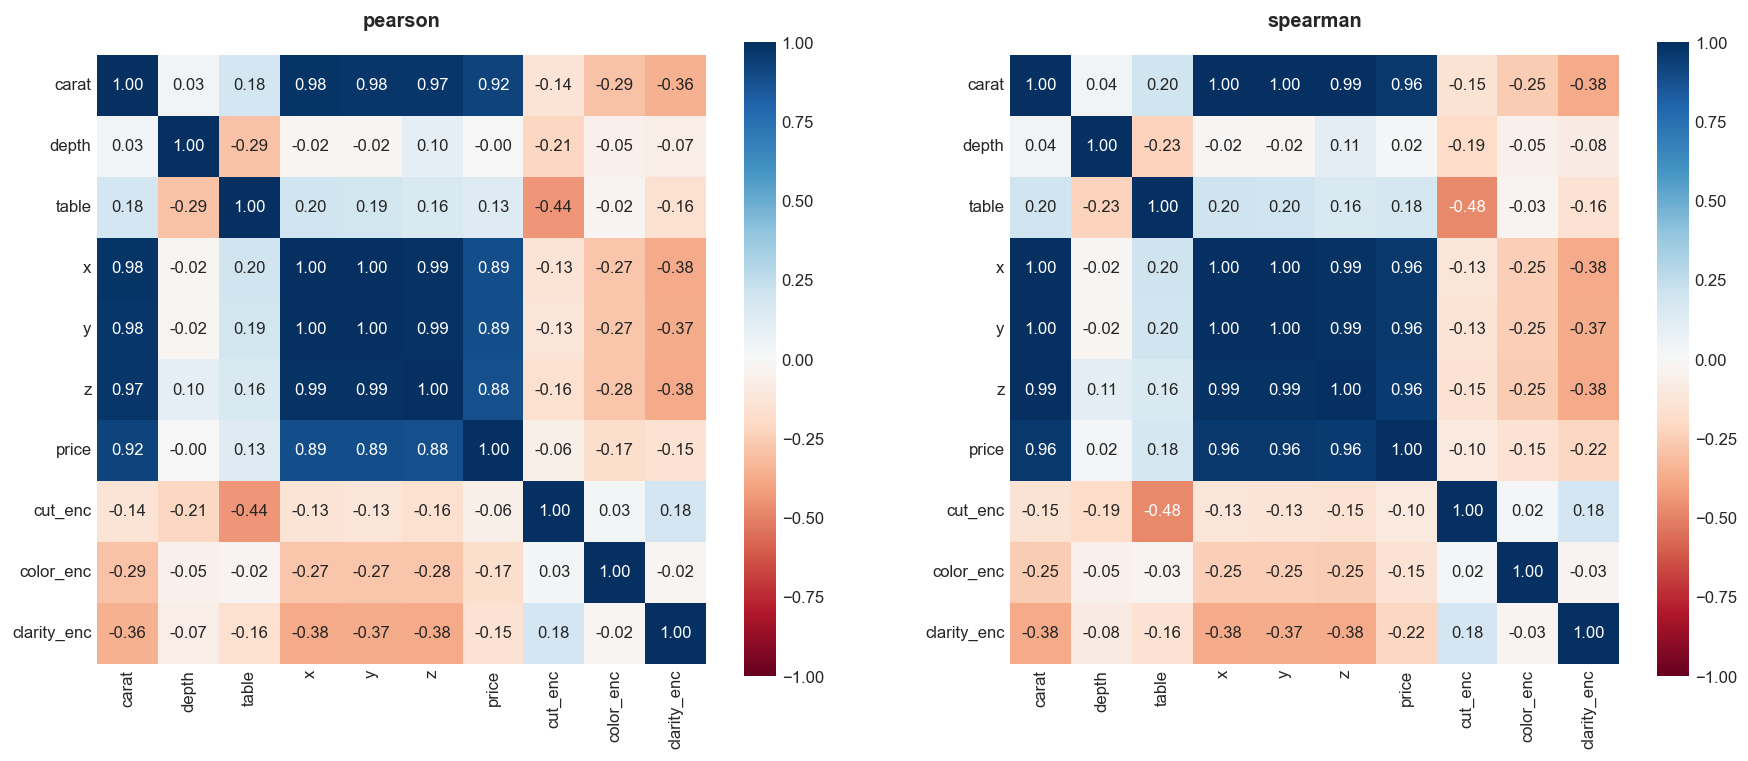

In [19]:
correlation(df, figsize=(18,7), dpi=120)

### Key takeaways:
+ The features **"carat", "x", "y", "z"** seem to have **near perfect correlation** to each other 
+ **"price"** also seems to be **highly correlated** with above features
+ "Table" and "cut_enc" have mild correlation

### Lets see pairwise scatter plot

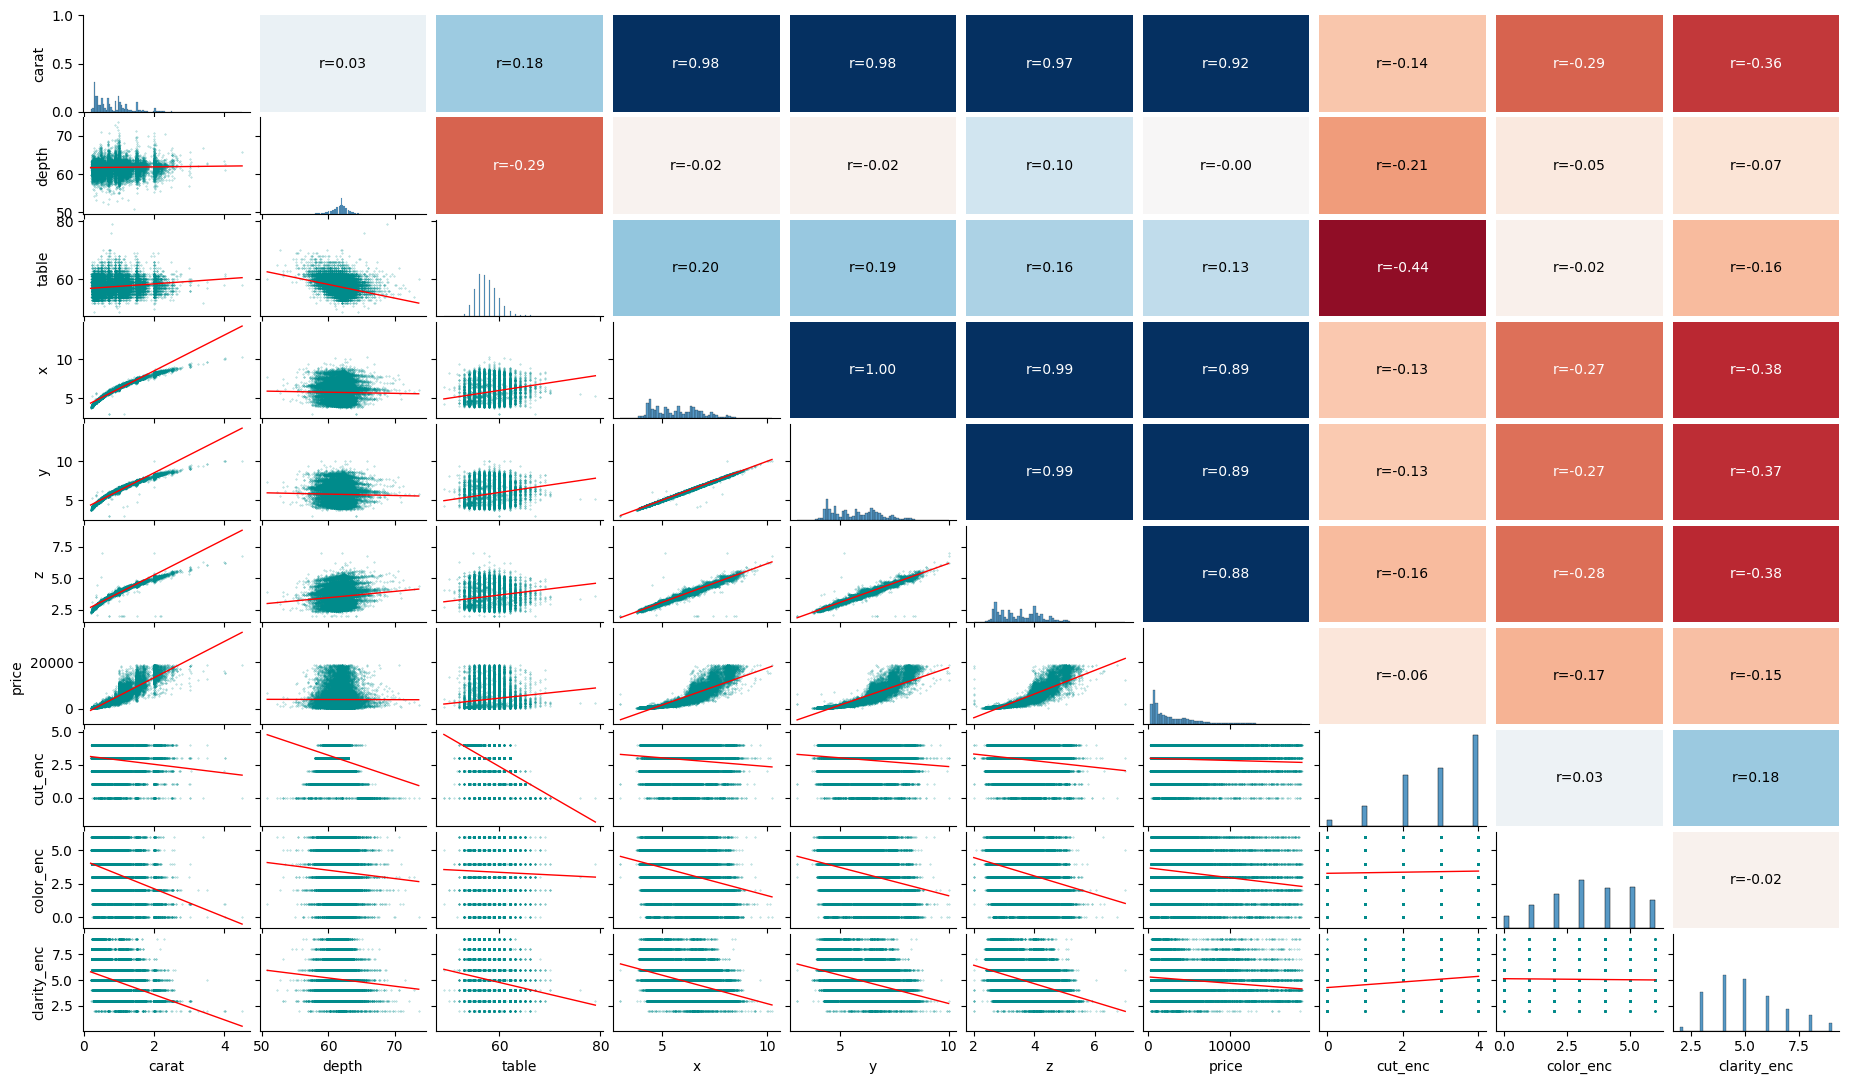

In [20]:
multiplot(df, dpi=100, point_size=0.1, aspect=1.7, height=1.1)

### A very bizzare thing to notice is that the ***"cut" "color" and "clarity"*** of stones ***decreases*** as ***"price" increases***
### Same can be said for rest of the quantative features vs "cut" "color" and "clarity"

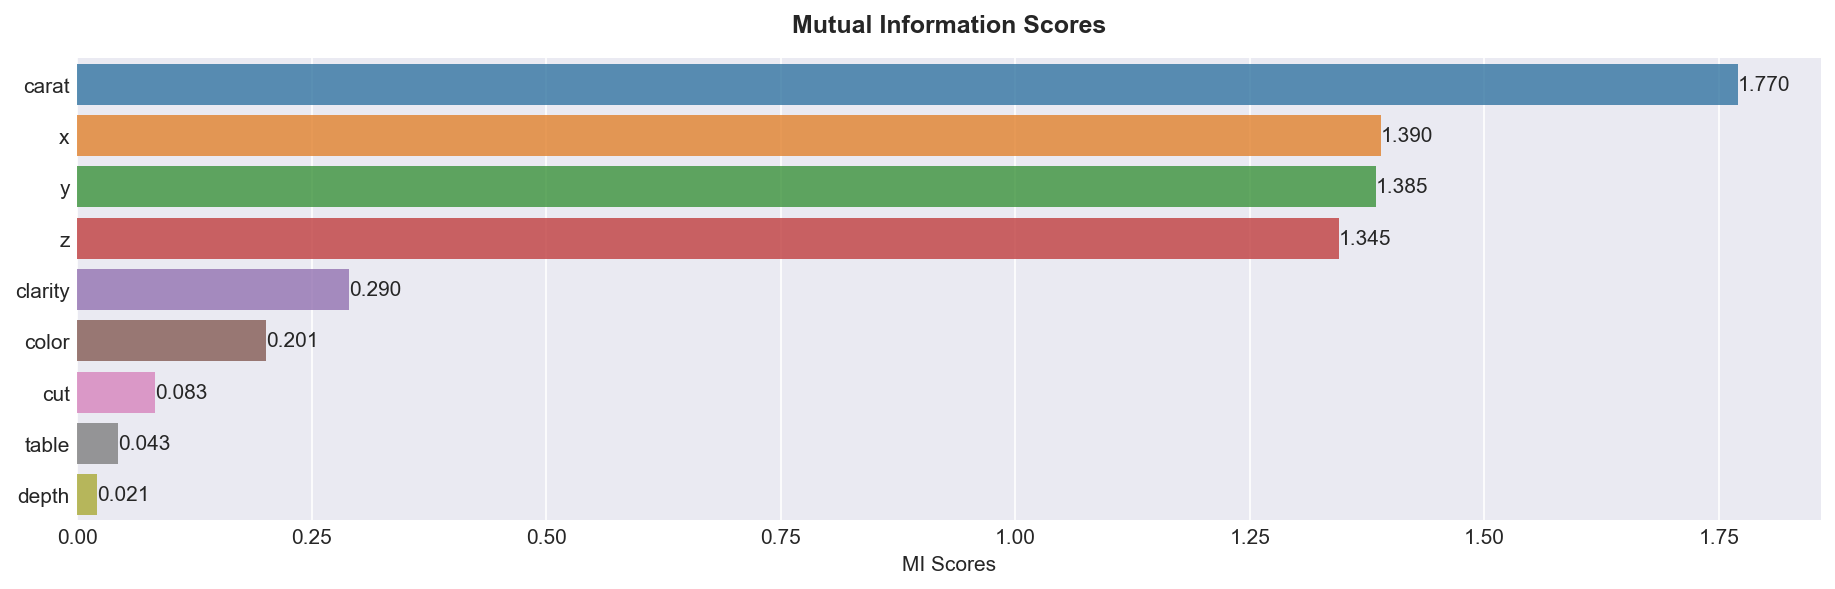

In [21]:
mutual_info(df.iloc[:,:-3], 'price', limit=-1)

### Key takeaways:
+ A expected, the features **"carat", "x", "y", "z"** seem to give quite a lot of information about **"price"**

### Lets see average and median price for each class in each categorical feature

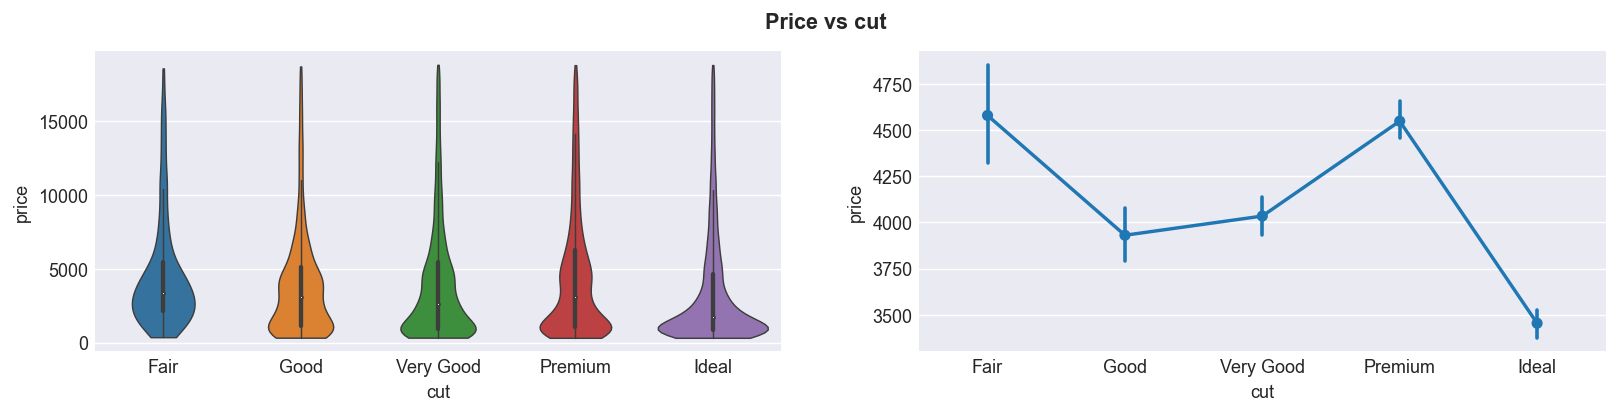

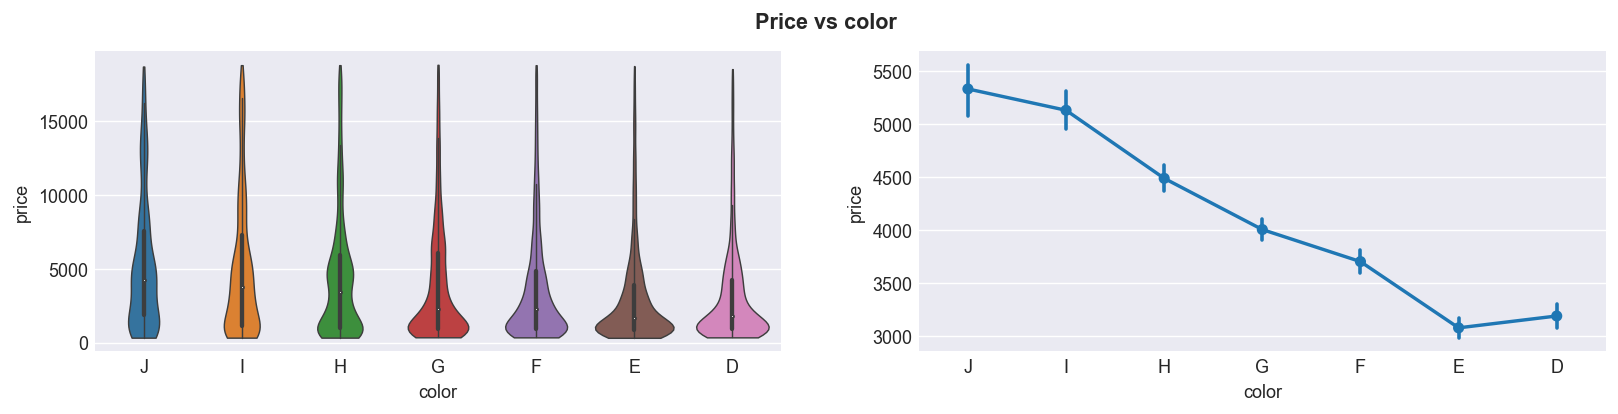

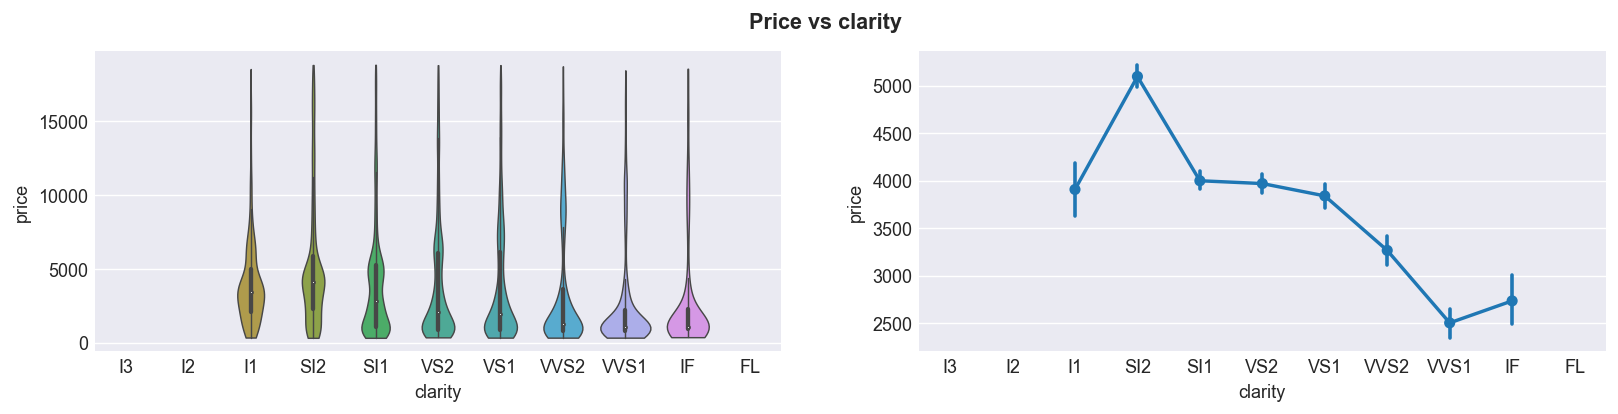

In [22]:
for col in df.select_dtypes('object').columns:    
    fig, ax=plt.subplots(1,2, figsize=(15,3), dpi=130)

    sns.violinplot(
        data=df,
        x=col,
        y='price',
        order=dict_classes[col], linewidth=0.8, saturation=0.7, cut=0, 
        ax=ax[0]
    )

    sns.pointplot(
        data=df,
        x=col,
        y='price',
        order=dict_classes[col], scale=0.7, errwidth=2, 
        ax=ax[1]
    )
    
    plt.suptitle(f'Price vs {col}',fontweight='bold')
    plt.show()

### Key takeaways:
+ It can be seen very clearly that as **color and clarity increases the price decreases**
+ **Premium** and **fair cuts** seem to be **pricier**
+ **"SL2"** clarity seems to be **pricier** than rest

# **Multivariate analysis**

    Since depth and table were showing least correlation with price, lets see any pattern in multvariate scenario
    Out of all the possible combinations I decided to keep only the interesting ones

### Price vs depth/table for various cut_enc(cut encoded)

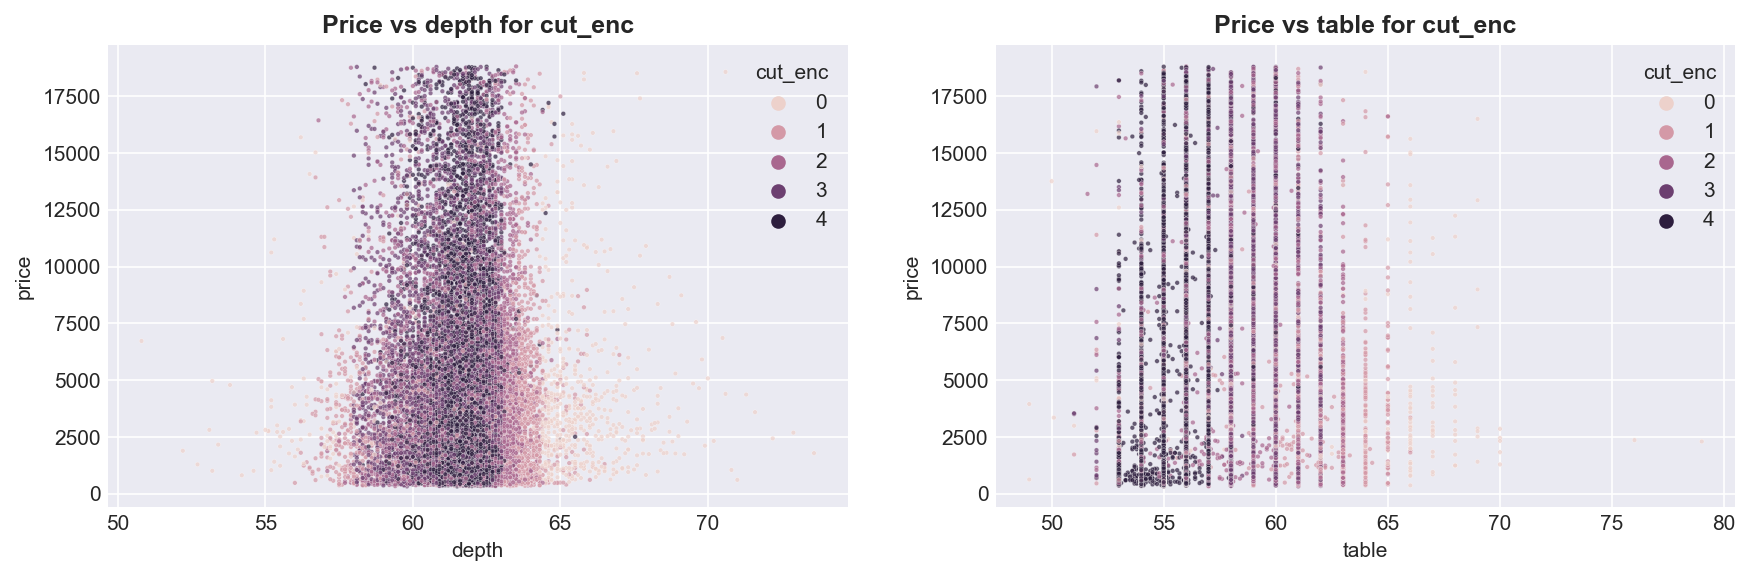

In [23]:
fig,ax= plt.subplots(1,2, figsize=(14,4), dpi=150)

for i,ele in enumerate(['depth','table']):    
    sns.scatterplot(
        data=df,
        x=ele,
        y='price',
        hue='cut_enc',
        alpha=0.7, s=5,
        ax=ax[i]
    )
    ax[i].set_title(f'Price vs {ele} for cut_enc', fontweight='bold')

plt.show()

### Key takeaways :
+ high quality cuts **(ideal and premium)** mostly have **median depth** whereas the lower quality cuts **(fair and good)** have **extreme depth** values
+ high quality cuts **(ideal and premium)** mostly have **lower table** whereas the low quality cuts **(fair and good)** have **higher table** values
</br>(Please refer to the data dictionary, image after it for meaning of table)
+ most **higher quality cuts** are concentrated in the **low price low table** area

### Price vs carat for various color_enc, clarity_enc

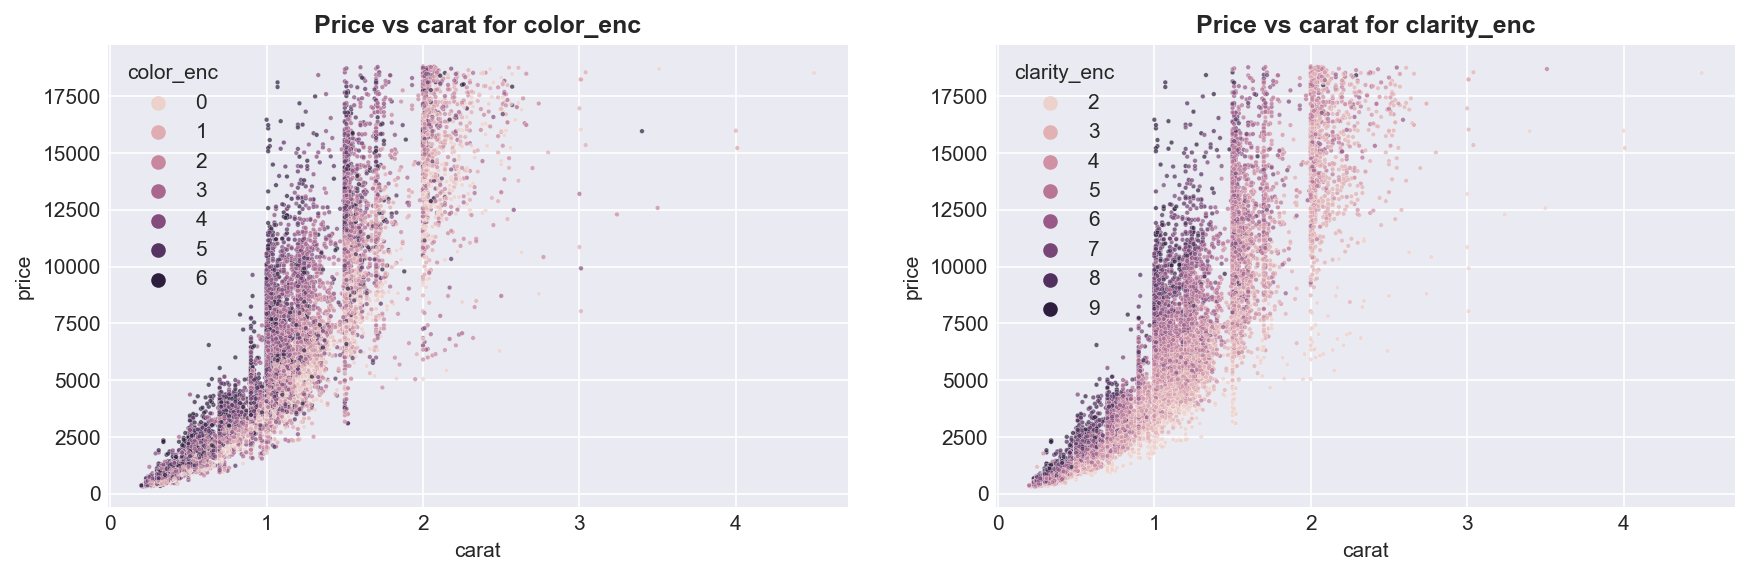

In [24]:
fig,ax= plt.subplots(1,2, figsize=(14,4), dpi=150)

for i,col in enumerate(['color_enc', 'clarity_enc']):    
    sns.scatterplot(
        data=df,
        x='carat',
        y='price',
        hue=col,
        alpha=0.7, s=5, legend='full',
        ax=ax[i]
    )
    ax[i].set_title(f'Price vs carat for {col}', fontweight='bold')

plt.show()

### Key takeaways :
+ **better color and clarity** gems are mostly **higher priced** in a **given carat range**

### Price vs x/y/z for various cut_enc, color_enc, clarity_enc: 

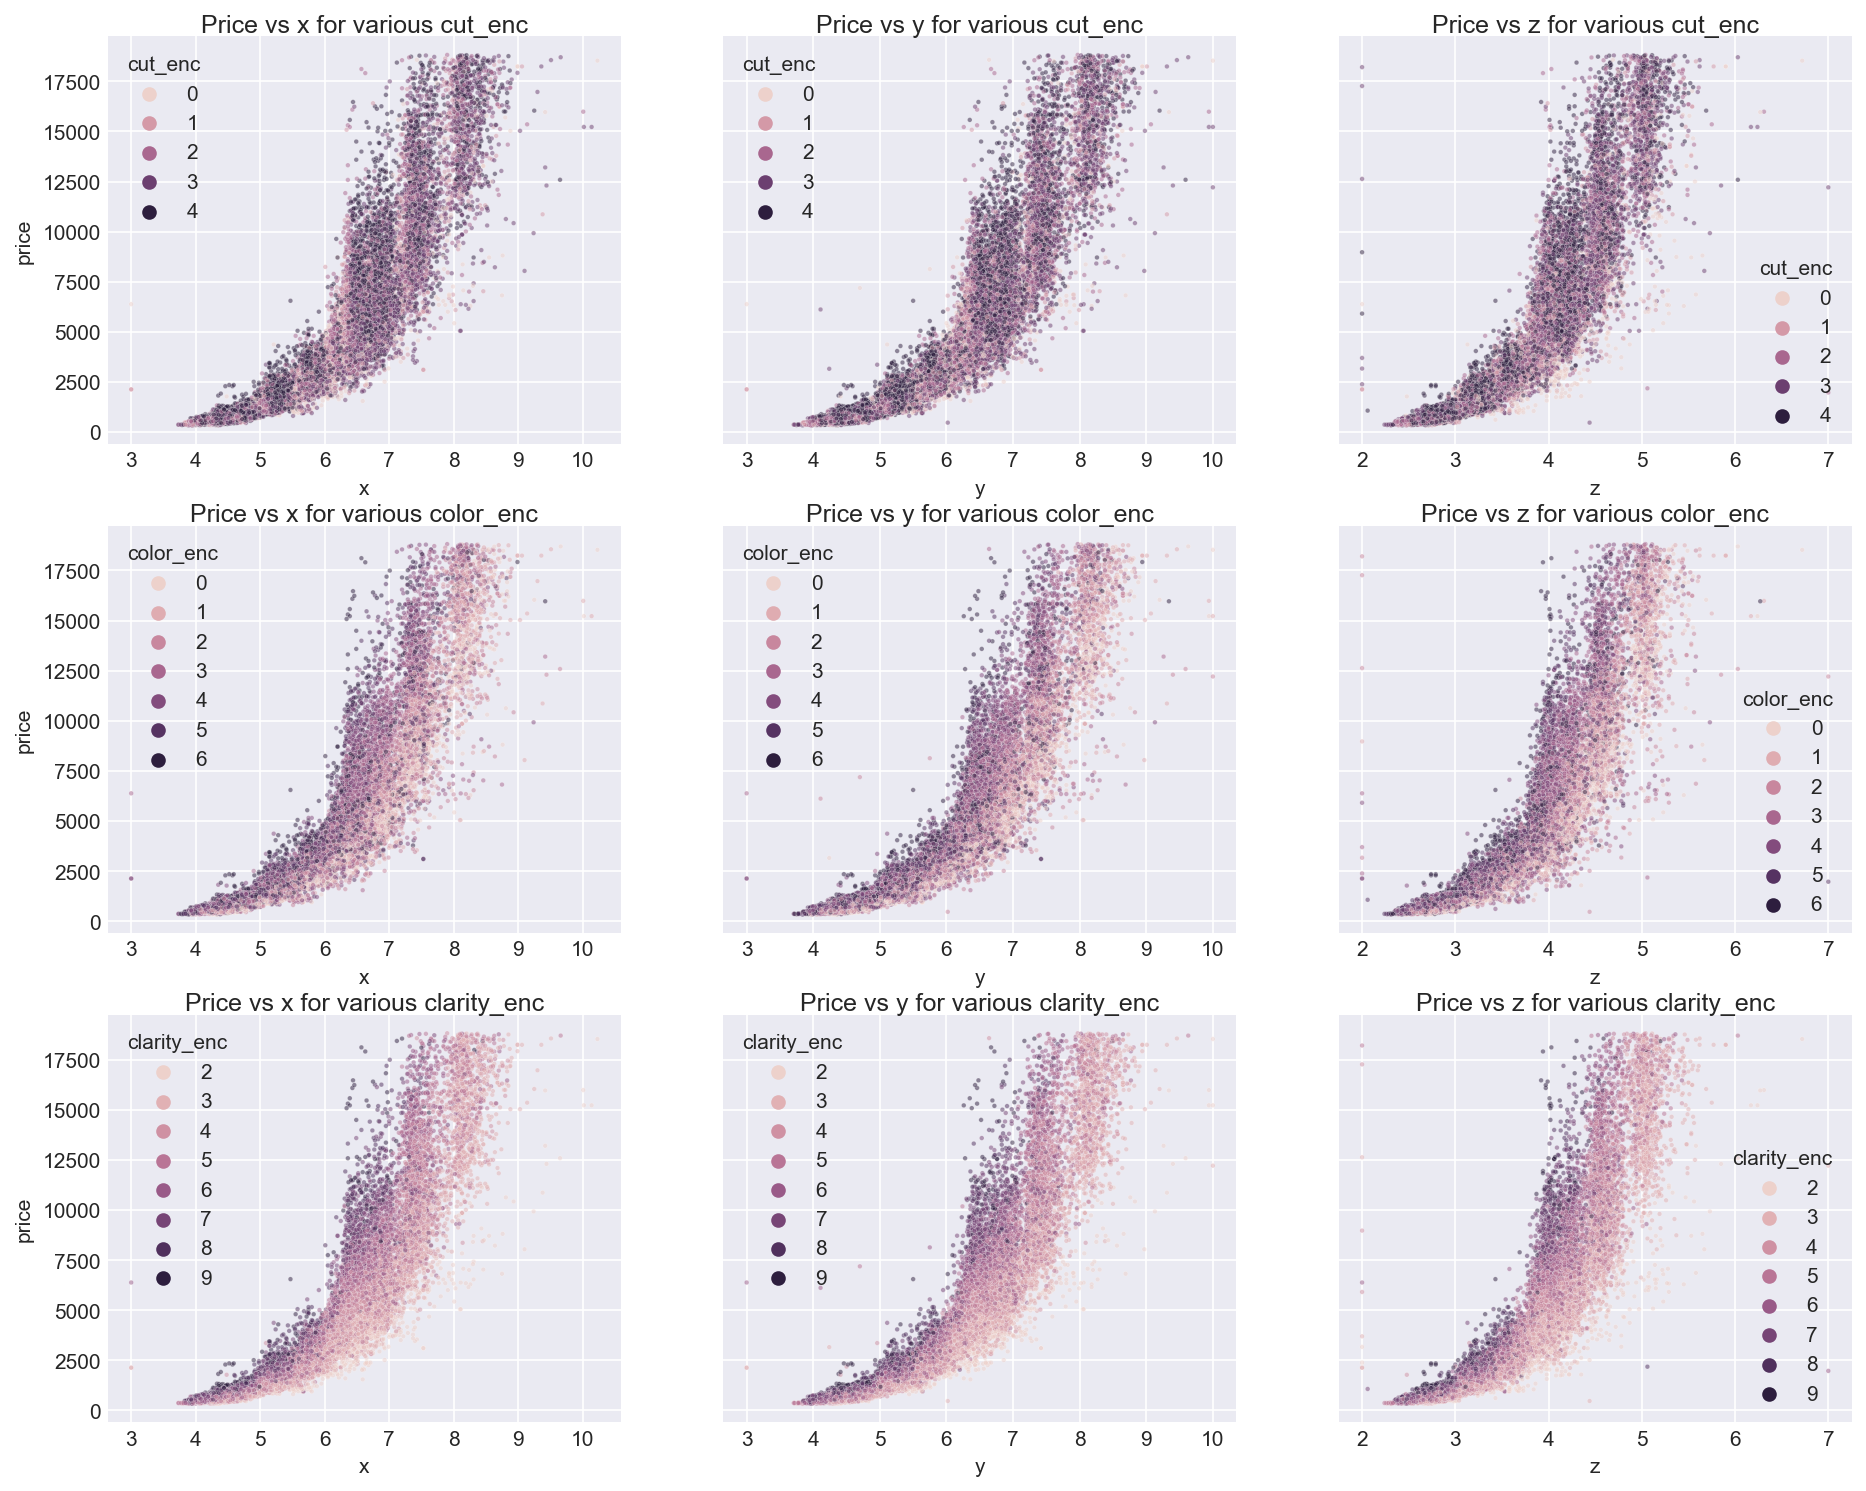

In [25]:
fig, ax = plt.subplots(3,3, figsize=(15,12), dpi=150, sharey=True)

for i,col in enumerate(['cut_enc', 'color_enc', 'clarity_enc']):
    for j,row in enumerate(['x','y','z']):
        sns.scatterplot(
            data=df,
            x=row,
            y='price',
            hue=col,
            alpha=0.5 , ax=ax[i][j], s=5, legend='full'
        )
        ax[i][j].set_title(f'Price vs {row} for various {col}', y=0.98)
        
plt.show()

### Key takeaways :
+ In the plot for **cut encoded** there seems to be a **weird interval based pattern** such that **lower quality cut** seems to occur 
+ **better color and clarity** gems are mostly **higher priced** in a **given interval of dimension**


### Depth vs table for various cut_enc

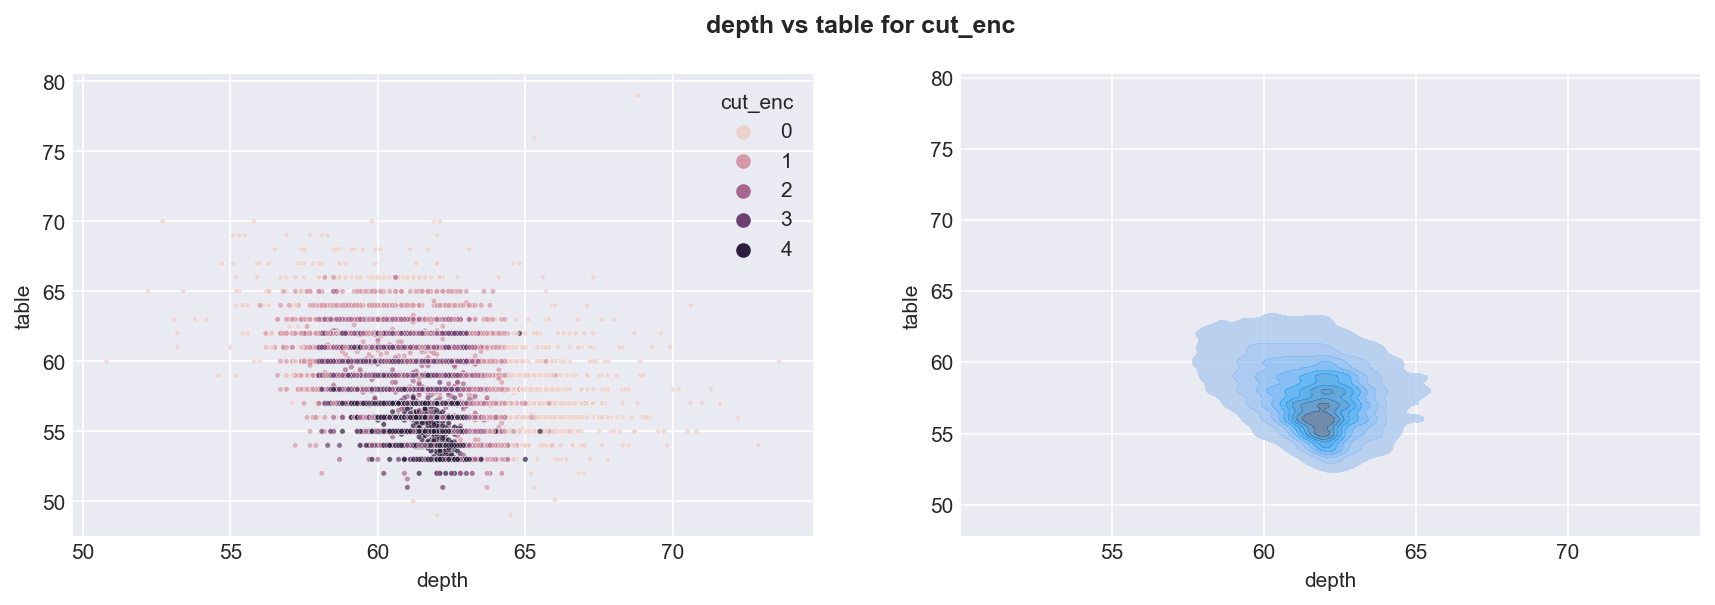

In [26]:
fig, ax = plt.subplots(1,2, figsize=(14, 4), dpi=150)

sns.scatterplot(
    data=df,
    x='depth',
    y='table',
    hue='cut_enc',
    alpha=0.7, s=7, legend='full',
    ax=ax[0]
)

sns.kdeplot(
    data=df,
    x='depth',
    y='table',
    shade='cut_enc',
    alpha=0.7, #legend='full',
    ax=ax[1]
)

plt.suptitle(f'depth vs table for cut_enc', fontweight='bold')
plt.show()

### Key takeaways:
+ There seems to be a very **specific pattern** that is **radial** in nature. The contour map shows this in a better way.
+ The points around **62 depth and 55 table** have **highest cut quality** while cut **quality deteriorates** as the points go **away from this.**